In [52]:
import keras_vggface
import mtcnn

import matplotlib.pyplot as plt
import numpy as np

from PIL import Image
from keras_vggface.vggface import VGGFace
from keras_vggface.utils import preprocess_input, decode_predictions

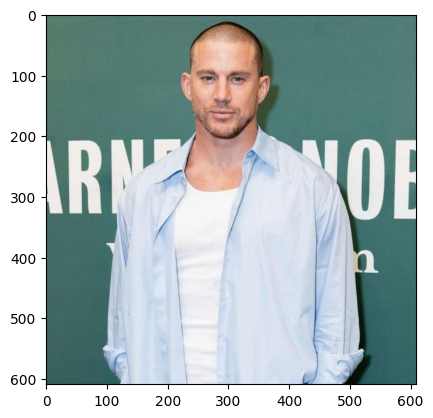

In [70]:
plt.imshow(plt.imread("test_images/channing_tatum1_low_cloaked.png"))

1/1 [==============================] - 0s 174ms/step


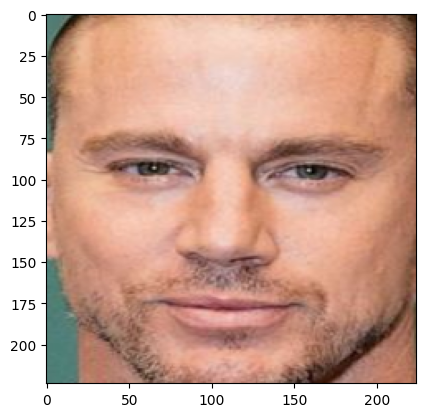

In [71]:
plt.imshow(extract_face("test_images/channing_tatum1.jpg"))

In [72]:
def extract_face(file_path, input_shape=(224, 224)):
    pixels = plt.imread(file_path)

    # create a face detector to get bounding box of face
    detector = mtcnn.MTCNN()
    results = detector.detect_faces(pixels)

    # get coordinates of bounding box
    x1, y1, width, height = results[0]["box"]
    x2, y2 = x1 + width, y1 + height

    # Get only face from image
    face = pixels[y1:y2, x1:x2]

    # Resize to proper input shape
    image = Image.fromarray(face)
    image = image.resize(input_shape)
    face_array = np.asarray(image)
    
    return face_array


In [73]:
def find_face(face):
    
    face = face.astype(np.float32)
    samples = np.expand_dims(face, axis=0)
    
    yhat = model.predict(samples)
    results = decode_predictions(yhat)
    
    for result in results[0]:
        print("%s: %.3f%%" % (result[0], result[1] * 100))

In [74]:
model = VGGFace(model="resnet50")

# Input Shape of Model
print("Inputs:", model.inputs)
# Output Shape of Model
print("Outputs:", model.outputs)

Inputs: [<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_66')>]
Outputs: [<KerasTensor: shape=(None, 8631) dtype=float32 (created by layer 'classifier')>]


In [75]:
#model.summary()

In [79]:
face = extract_face("test_images/channing_tatum1_low_cloaked.png")
plt.imshow(face)

find_face(face)

1/1 [==============================] - 0s 31ms/step


IndexError: list index out of range

In [80]:
face = extract_face("test_images/channing_tatum1_low_cloaked.png")
plt.imshow(face)

1/1 [==============================] - 0s 34ms/step


IndexError: list index out of range

In [77]:
face = face.astype(np.float32)
samples = np.expand_dims(face, axis=0)

yhat = model.predict(samples)
results = decode_predictions(yhat)

1/1 [==============================] - 1s 799ms/step


In [78]:
detector = mtcnn.MTCNN()
results = detector.detect_faces(pixels)

[[["b' Channing_Tatum'", 0.9932175],
  ["b' Antonio_Mohamed'", 0.0011224203],
  ["b' Ryan_Peake'", 0.00031411866],
  ["b' Danny_Dyer'", 0.00028765775],
  ["b' Fernando_Colunga'", 0.0002591495]]]